# N·ªòI DUNG ƒê·ªÄ T√ÄI

### S·ª≠ d·ª•ng Hierarchical Clustering D·ª± b√°o xu h∆∞·ªõng gi√° v√†ng, Ph√°t hi·ªán c√°c m√¥ h√¨nh trong qu√° kh·ª© c√≥ th·ªÉ l·∫∑p l·∫°i trong t∆∞∆°ng lai.
* H·ªó tr·ª£ ƒë·∫ßu t∆∞: Gi√∫p nh√† ƒë·∫ßu t∆∞ ph√¢n lo·∫°i giai ƒëo·∫°n th·ªã tr∆∞·ªùng v√† ƒë∆∞a ra chi·∫øn l∆∞·ª£c ph√π h·ª£p.
* Ph√¢n t√≠ch t√°c ƒë·ªông kinh t·∫ø: X√°c ƒë·ªãnh ·∫£nh h∆∞·ªüng c·ªßa c√°c ch·ªâ s·ªë t√†i ch√≠nh ƒë·∫øn gi√° v√†ng.

Trong d·ª± √°n n√†y, ch√∫ng t√¥i s·ª≠ d·ª•ng h√†m linkage th·ª±c hi·ªán ph√¢n c·ª•m ph√¢n c·∫•p v·ªõi ph∆∞·ªùng th·ª©c l√† Euclidean Distance gi√∫p x√°c ƒë·ªãnh kho·∫£ng c√°ch gi·ªØa c√°c c·ª•m.

### Chu·∫©n b·ªã d·ªØ li·ªáu
* D·ªØ li·ªáu gi√° v√†ng ƒë∆∞·ª£c t·∫£i t·ª´ Yahoo Finance (GLD), quy ƒë·ªïi sang VND/l∆∞·ª£ng.
* T√≠nh hai ƒë·∫∑c tr∆∞ng: Daily_Change (% thay ƒë·ªïi gi√° h√†ng ng√†y) v√† Volatility (ƒë·ªô l·ªách chu·∫©n 7 ng√†y).


# Chu·∫©n b·ªã th∆∞ vi·ªán v√† thi·∫øt l·∫≠p d·ªØ li·ªáu

In [22]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from datetime import datetime
import requests


In [ ]:
# D√πng th∆∞ vi·ªán yfinance ƒë·ªÉ l·∫•y gi√° c·ªï phi·∫øu GLD -SPDR Gold Shares (ƒë·∫°i di·ªán gi√° v√†ng th·∫ø gi·ªõi)- Yahoo Finance

# Ch·ªâ l·∫•y gi√° ƒë√≥ng c·ª≠a (Close)

ticker = "GLD"
data = yf.download(ticker, start="2025-01-01", end=datetime.today().date())  
print(data)
data = data[['Close']].reset_index()  
data.columns = ['Date', 'Gold_Price']

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             GLD         GLD         GLD         GLD       GLD
Date                                                                
2025-01-02  245.419998  245.529999  244.080002  244.220001   6241900
2025-01-03  243.490005  244.820007  243.360001  244.559998   4872100
2025-01-06  243.190002  243.789993  242.050003  242.330002   3758900
2025-01-07  244.559998  245.770004  243.809998  245.520004   5090300
2025-01-08  245.860001  246.449997  244.509995  245.720001   6303300
...                ...         ...         ...         ...       ...
2025-05-02  297.980011  300.850006  297.029999  300.170013   8678400
2025-05-05  306.880005  307.649994  304.679993  305.920013   8924000
2025-05-06  315.480011  315.619995  311.399994  313.119995  11445300
2025-05-07  310.750000  313.260010  310.079987  312.100006   7910000
2025-05-08  304.630005  310.465088  303.049988  309.760010  11878447

[87 rows x 5 columns]


In [29]:
# L·∫•y t·ª∑ gi√° chu·∫©n t·ª´ API
def get_exchange_rate():
    try:
        response = requests.get("https://api.exchangerate-api.com/v4/latest/USD")
        exchange_rate = response.json()['rates']['VND']
        return exchange_rate
    except:
        return 25000  
   
#Quy ƒë·ªïi th√†nh:
# USD/ounce
# VND/l∆∞·ª£ng (quy ƒë·ªïi theo t·ª∑ gi√° USD/VND)

data['Gold_Price_Ounce'] = data['Gold_Price'] * 10  
data['Gold_Price_VND_per_Luong'] = (data['Gold_Price_Ounce'] * get_exchange_rate()) / 0.8294  # VND/l∆∞·ª£ng


In [30]:
# T√≠nh to√°n ƒë·∫∑c tr∆∞ng
# T√≠nh % thay ƒë·ªïi gi√° m·ªói ng√†y
# T√≠nh ƒë·ªô l·ªách chu·∫©n 7 ng√†y l√†m bi·∫øn ƒë·ªông

data['Daily_Change'] = data['Gold_Price_VND_per_Luong'].pct_change() * 100  # % thay ƒë·ªïi
data['Volatility'] = data['Gold_Price_VND_per_Luong'].rolling(window=7).std()  # Bi·∫øn ƒë·ªông 7 ng√†y
data = data.dropna()  # Lo·∫°i b·ªè NaN

In [31]:
# Chu·∫©n h√≥a d·ªØ li·ªáu b·∫±ng StandardScaler ƒë·ªÉ ƒë∆∞a v·ªÅ c√πng thang ƒëo

X = data[['Daily_Change', 'Volatility']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

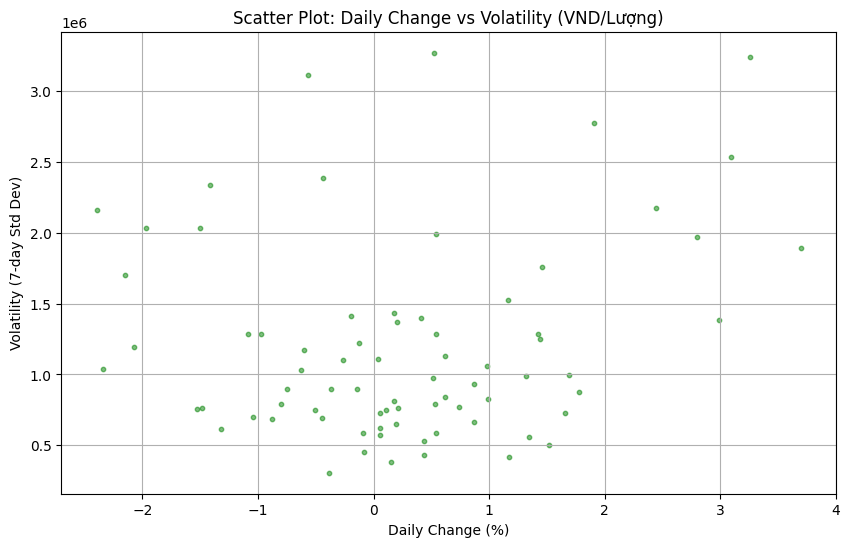

In [32]:
# 1. V·∫Ω scatter plot c·ªßa Daily_Change v√† Volatility

plt.figure(figsize=(10, 6))
plt.scatter(data['Daily_Change'], data['Volatility'], s=10, c='green', alpha=0.5)
plt.title('Scatter Plot: Daily Change vs Volatility (VND/L∆∞·ª£ng)')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.grid(True)
plt.show()

# √Åp d·ª•ng Hierarchical Clustering b·∫±ng ph∆∞∆°ng th·ª©c Euclidean Method

In [33]:
# S·ª≠ d·ª•ng ph√©p gom c·ª•m ph√¢n c·∫•p (hierarchical clustering) v·ªõi h√†m linkage t·ª´ th∆∞ vi·ªán SciPy,t·∫°o ra ma tr·∫≠n li√™n k·∫øt Z,gi√∫p x√°c ƒë·ªãnh c√°ch nh√≥m ƒëi·ªÉm d·ªØ li·ªáu l·∫°i th√†nh c·ª•m. 

Z = linkage(X_scaled, method='average', metric='euclidean')

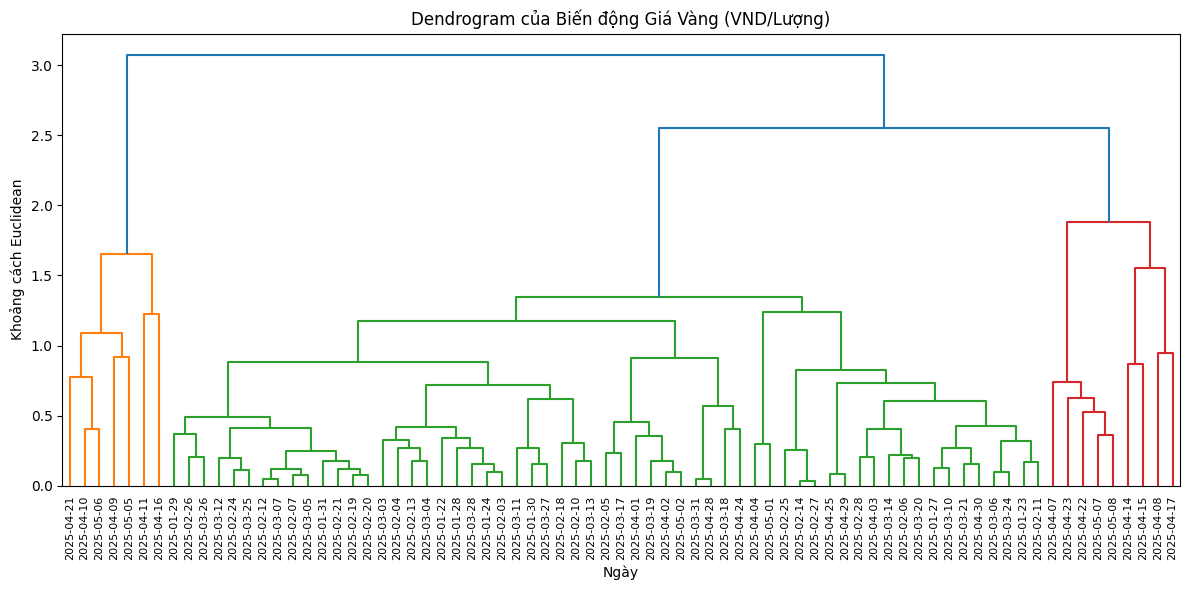

In [34]:
# D√πng dendrogram ƒë·ªÉ tr·ª±c quan ho√° c√°ch c√°c ƒëi·ªÉm ƒë∆∞·ª£c gom th√†nh t·ª´ng c·ª•m

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=data['Date'].dt.strftime('%Y-%m-%d').values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram c·ªßa Bi·∫øn ƒë·ªông Gi√° V√†ng (VND/L∆∞·ª£ng)')
plt.xlabel('Ng√†y')
plt.ylabel('Kho·∫£ng c√°ch Euclidean')
plt.tight_layout()
plt.show()


In [35]:
# Ch·ªçn s·ªë c·ª•m = 3 v√† g√°n nh√£n c·ª•m cho t·ª´ng ng√†y

num_hierarchical_clusters = 3  
hierarchical_clusters = fcluster(Z, t=num_hierarchical_clusters, criterion='maxclust')
data['Cluster'] = hierarchical_clusters



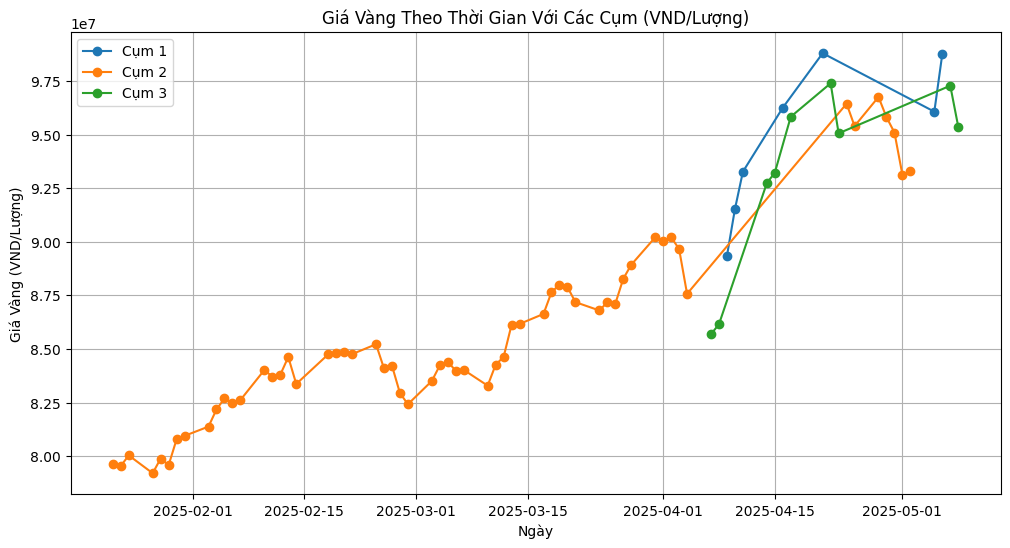

In [36]:
# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì:
# Bi·ªÉu ƒë·ªì gi√° v√†ng theo t·ª´ng c·ª•m m√†u

plt.figure(figsize=(12, 6))
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.plot(cluster_data['Date'], cluster_data['Gold_Price_VND_per_Luong'], label=f'C·ª•m {cluster}', marker='o', linestyle='-')
plt.title('Gi√° V√†ng Theo Th·ªùi Gian V·ªõi C√°c C·ª•m (VND/L∆∞·ª£ng)')
plt.xlabel('Ng√†y')
plt.ylabel('Gi√° V√†ng (VND/L∆∞·ª£ng)')
plt.legend()
plt.grid(True)
plt.show()

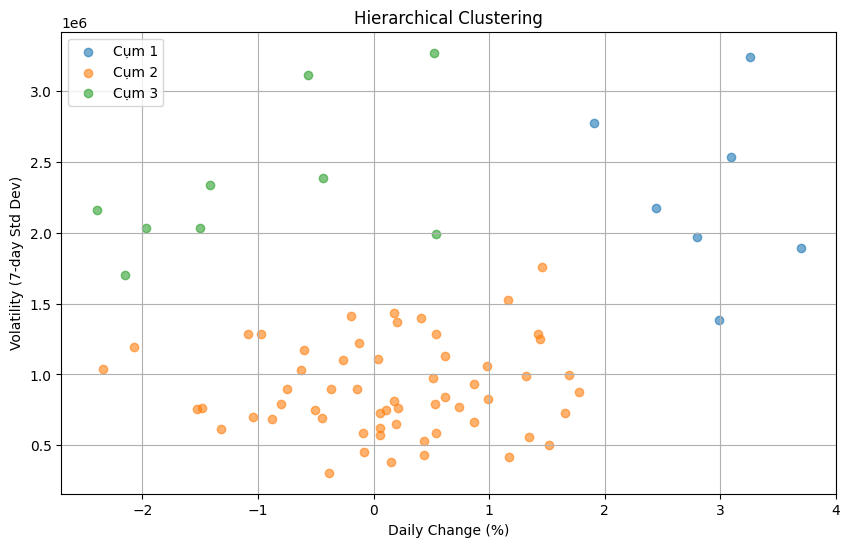

In [37]:
# Bi·ªÉu ƒë·ªì ph√¢n t√°n gi·ªØa Daily Change v√† Volatility theo t·ª´ng c·ª•m.

plt.figure(figsize=(10, 6))
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Daily_Change'], cluster_data['Volatility'], label=f'C·ª•m {cluster}', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.legend()
plt.grid(True)

In [38]:
#  Ph√¢n t√≠ch c·ª•m:
# M·ªói c·ª•m ƒë·∫°i di·ªán cho c√°c giai ƒëo·∫°n c√≥ ƒë·∫∑c ƒëi·ªÉm bi·∫øn ƒë·ªông v√† thay ƒë·ªïi gi√° kh√°c nhau

print("Th√¥ng tin c√°c c·ª•m:")
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"C·ª•m {cluster}: {len(cluster_data)} ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: {cluster_data['Volatility'].mean():.2f}, Thay ƒë·ªïi trung b√¨nh: {cluster_data['Daily_Change'].mean():.2f}%")

Th√¥ng tin c√°c c·ª•m:
C·ª•m 1: 7 ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: 2281537.71, Thay ƒë·ªïi trung b√¨nh: 2.88%
C·ª•m 2: 59 ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: 894948.97, Thay ƒë·ªïi trung b√¨nh: 0.14%
C·ª•m 3: 9 ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: 2337763.29, Thay ƒë·ªïi trung b√¨nh: -1.04%


# √Åp d·ª•ng K-Means Clustering

In [39]:
# D√πng KMeans(n_clusters=3) ƒë·ªÉ ph√¢n c·ª•m c√πng d·ªØ li·ªáu.

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_clusters + 1  # +1 ƒë·ªÉ nh√£n c·ª•m b·∫Øt ƒë·∫ßu t·ª´ 1

# ƒê√°nh gi√° hi·ªáu su·∫•t gi·ªØa Hierarchical Cluster v√† K-Means Clustering

In [41]:
# So s√°nh hi·ªáu qu·∫£ gi·ªØa 2 thu·∫≠t to√°n b·∫±ng:

# Silhouette Score (cao h∆°n ‚Üí t·ªët h∆°n)

# Davies-Bouldin Index (th·∫•p h∆°n ‚Üí t·ªët h∆°n)

# Silhouette Score (c√†ng cao c√†ng t·ªët, t·ª´ -1 ƒë·∫øn 1)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_clusters)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_clusters)

# Davies-Bouldin Index (c√†ng th·∫•p c√†ng t·ªët)
hierarchical_db = davies_bouldin_score(X_scaled, hierarchical_clusters)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_clusters)

print("So s√°nh hi·ªáu su·∫•t:")
print("- Silhouette Score c√†ng cao c√†ng t·ªët, t·ª´ -1 ƒë·∫øn 1")
print(f"\t + Silhouette Score (Hierarchical): {hierarchical_silhouette:.4f}")
print(f"\t + Silhouette Score (K-Means): {kmeans_silhouette:.4f}")
print("- Davies-Bouldin c√†ng th·∫•p c√†ng t·ªët")
print(f"\t + Davies-Bouldin Index (Hierarchical): {hierarchical_db:.4f}")
print(f"\t + Davies-Bouldin Index (K-Means): {kmeans_db:.4f}")

So s√°nh hi·ªáu su·∫•t:
- Silhouette Score c√†ng cao c√†ng t·ªët, t·ª´ -1 ƒë·∫øn 1
	 + Silhouette Score (Hierarchical): 0.5182
	 + Silhouette Score (K-Means): 0.4847
- Davies-Bouldin c√†ng th·∫•p c√†ng t·ªët
	 + Davies-Bouldin Index (Hierarchical): 0.7077
	 + Davies-Bouldin Index (K-Means): 0.7517


# 5. V·∫Ω bi·ªÉu ƒë·ªì gi√° v√†ng v·ªõi c√°c c·ª•m (K-Means)

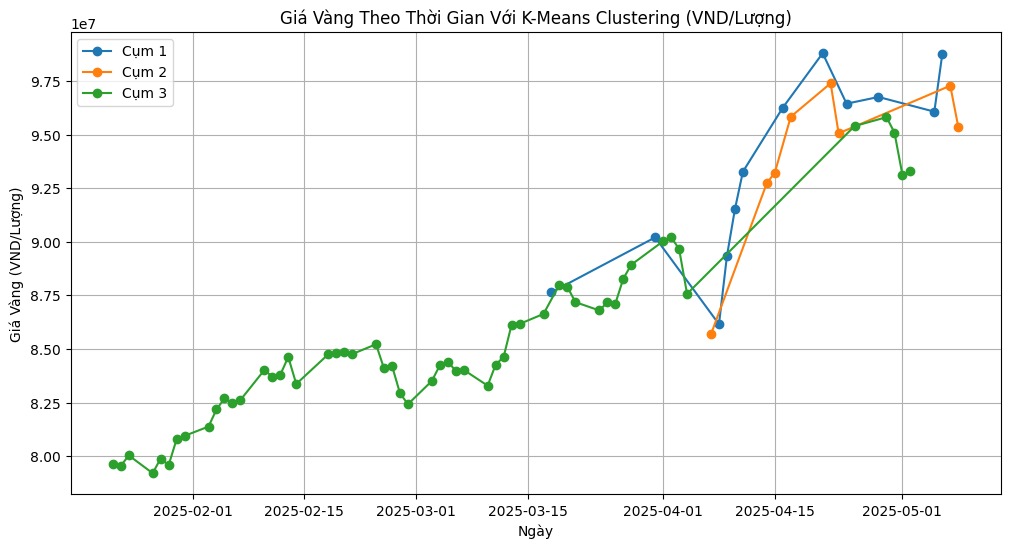

In [43]:
#Bi·ªÉu ƒë·ªì gi√° v√†ng theo c·ª•m KMeans.

plt.figure(figsize=(12, 6))
for cluster in np.unique(kmeans_clusters + 1):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    plt.plot(cluster_data['Date'], cluster_data['Gold_Price_VND_per_Luong'], label=f'C·ª•m {cluster}', marker='o', linestyle='-')
plt.title('Gi√° V√†ng Theo Th·ªùi Gian V·ªõi K-Means Clustering (VND/L∆∞·ª£ng)')
plt.xlabel('Ng√†y')
plt.ylabel('Gi√° V√†ng (VND/L∆∞·ª£ng)')
plt.legend()
plt.grid(True)
plt.show()

# 6. V·∫Ω scatter plot so s√°nh gi·ªØa Hierarchical Clustering v√† K-Means Clustering

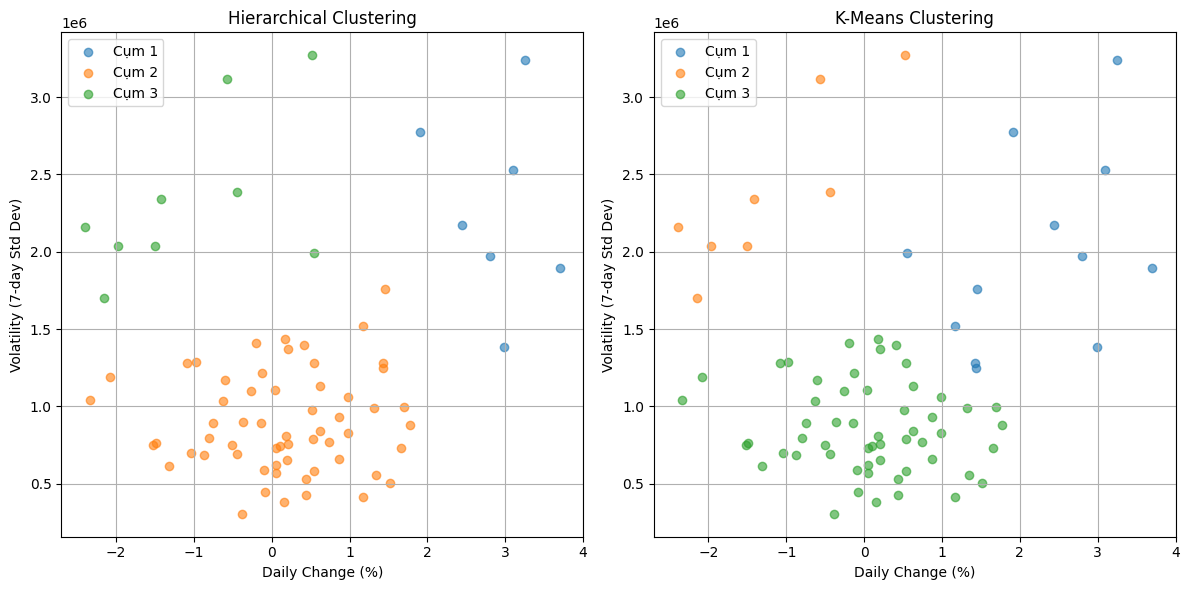

**N·∫øu b·∫°n mu·ªën th·ª≠ s·ªë c·ª•m kh√°c, thay ƒë·ªïi t=3 (Hierarchical) v√† n_clusters=3 (K-Means). ƒê·ªÉ ch·ªçn s·ªë c·ª•m t·ªëi ∆∞u cho K-Means, b·∫°n c√≥ th·ªÉ th√™m Elbow Method ƒë·ªÉ tham kh·∫£o nh∆∞ b√™n d∆∞·ªõi**


In [44]:
#Bi·ªÉu ƒë·ªì ph√¢n t√°n gi·ªØa Daily Change v√† Volatility cho c·∫£ 2 ph∆∞∆°ng ph√°p.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Daily_Change'], cluster_data['Volatility'], label=f'C·ª•m {cluster}', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for cluster in np.unique(kmeans_clusters + 1):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['Daily_Change'], cluster_data['Volatility'], label=f'C·ª•m {cluster}', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("**N·∫øu b·∫°n mu·ªën th·ª≠ s·ªë c·ª•m kh√°c, thay ƒë·ªïi t=3 (Hierarchical) v√† n_clusters=3 (K-Means). ƒê·ªÉ ch·ªçn s·ªë c·ª•m t·ªëi ∆∞u cho K-Means, b·∫°n c√≥ th·ªÉ th√™m Elbow Method ƒë·ªÉ tham kh·∫£o nh∆∞ b√™n d∆∞·ªõi**")

***M·ªü r·ªông b√†i to√°n
Ch·ªçn s·ªë c·ª•m t·ªëi ∆∞u b·∫±ng Elbow Method (K-Means)

Elbow Method gi√∫p x√°c ƒë·ªãnh s·ªë c·ª•m h·ª£p l√Ω cho K-Means b·∫±ng c√°ch v·∫Ω bi·ªÉu ƒë·ªì gi·ªØa:

S·ªë c·ª•m (k) v√†

T·ªïng ph∆∞∆°ng sai n·ªôi c·ª•m (Inertia)

Khi ƒë∆∞·ªùng bi·ªÉu ƒë·ªì b·∫Øt ƒë·∫ßu "g√£y kh√∫c" (gi·ªëng h√¨nh khu·ª∑u tay), ƒë√≥ l√† s·ªë c·ª•m ph√π h·ª£p nh·∫•t.

=>  √ù nghƒ©a th·ª±c t·∫ø:

Gi√∫p tr√°nh ch·ªçn s·ªë c·ª•m qu√° nhi·ªÅu ho·∫∑c qu√° √≠t, ƒë·∫£m b·∫£o vi·ªác ph√¢n c·ª•m l√† t·ªëi ∆∞u v√† h·ª£p l√Ω

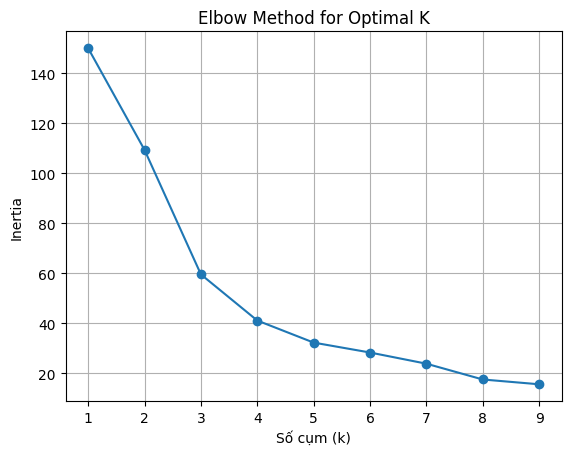

In [45]:
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('S·ªë c·ª•m (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


** Th√™m bi·ªÉu ƒë·ªì ph√¢n b·ªë d·ªØ li·ªáu theo th·ªùi gian
    Bi·ªÉu ƒë·ªì ƒë∆∞·ªùng th·ªùi gian gi√∫p th·∫•y r√µ:

    Chu k·ª≥ tƒÉng/gi·∫£m c·ªßa gi√° v√†ng

    Nh·ªØng giai ƒëo·∫°n bi·∫øn ƒë·ªông b·∫•t th∆∞·ªùng ho·∫∑c ·ªïn ƒë·ªãnh

=> Bi·ªÉu ƒë·ªì n√†y gi√∫p ng∆∞·ªùi nghe h√¨nh dung ƒë∆∞·ª£c c√°c giai ƒëo·∫°n th·ªã tr∆∞·ªùng c√≥ d·∫•u hi·ªáu ·ªïn ƒë·ªãnh hay kh·ªßng ho·∫£ng ‚Äî t·ª´ ƒë√≥ gi√∫p ƒë∆∞a ra chi·∫øn l∆∞·ª£c ƒë·∫ßu t∆∞ ph√π h·ª£p.

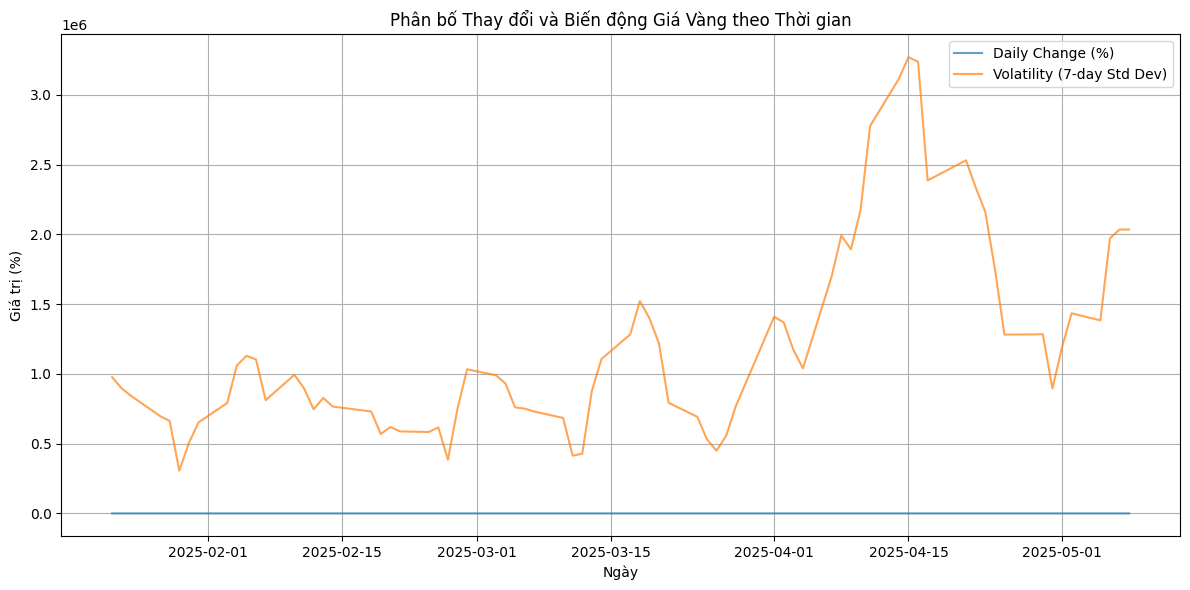

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily_Change'], label='Daily Change (%)', alpha=0.7)
plt.plot(data['Date'], data['Volatility'], label='Volatility (7-day Std Dev)', alpha=0.7)
plt.title('Ph√¢n b·ªë Thay ƒë·ªïi v√† Bi·∫øn ƒë·ªông Gi√° V√†ng theo Th·ªùi gian')
plt.xlabel('Ng√†y')
plt.ylabel('Gi√° tr·ªã (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Gi·∫£i th√≠ch t·ª´ng ph·∫ßn**
1. Chu·∫©n b·ªã d·ªØ li·ªáu
    * D·ªØ li·ªáu gi√° v√†ng ƒë∆∞·ª£c t·∫£i t·ª´ Yahoo Finance (GLD), quy ƒë·ªïi sang VND/l∆∞·ª£ng.
    * T√≠nh hai ƒë·∫∑c tr∆∞ng: Daily_Change (% thay ƒë·ªïi gi√° h√†ng ng√†y) v√† Volatility (ƒë·ªô l·ªách chu·∫©n 7 ng√†y).
2. √Åp d·ª•ng Hierarchical Clustering
    * S·ª≠ d·ª•ng linkage v·ªõi ph∆∞∆°ng ph√°p average v√† chia th√†nh 3 c·ª•m b·∫±ng fcluster
3. √Åp d·ª•ng K-Means Clustering:
    * S·ª≠ d·ª•ng KMeans t·ª´ sklearn v·ªõi k=3, random_state=42 ƒë·ªÉ ƒë·∫£m b·∫£o k·∫øt qu·∫£ c√≥ th·ªÉ t√°i l·∫≠p.
4. ƒê√°nh gi√° hi·ªáu su·∫•t
    * Silhouette Score: ƒêo l∆∞·ªùng m·ª©c ƒë·ªô t√°ch bi·ªát gi·ªØa c√°c c·ª•m (gi√° tr·ªã t·ª´ -1 ƒë·∫øn 1, c√†ng cao c√†ng t·ªët).
    * Davies-Bouldin Index: ƒêo l∆∞·ªùng t·ª∑ l·ªá gi·ªØa ƒë·ªô ph√¢n t√°n trong c·ª•m v√† kho·∫£ng c√°ch gi·ªØa c√°c c·ª•m (c√†ng th·∫•p c√†ng t·ªët).
5. Tr·ª±c quan h√≥a:
    * V·∫Ω bi·ªÉu ƒë·ªì gi√° v√†ng theo th·ªùi gian v·ªõi c√°c c·ª•m t·ª´ c·∫£ hai ph∆∞∆°ng ph√°p.
    * V·∫Ω scatter plot ƒë·ªÉ so s√°nh c√°ch c√°c ƒëi·ªÉm d·ªØ li·ªáu ƒë∆∞·ª£c ph√¢n c·ª•m.
6. So s√°nh hi·ªáu su·∫•t (d·ª± ki·∫øn)
    - Silhouette Score
    * N·∫øu K-Means c√≥ ƒëi·ªÉm cao h∆°n, ƒëi·ªÅu n√†y cho th·∫•y c√°c c·ª•m ƒë∆∞·ª£c ph√¢n t√°ch t·ªët h∆°n, v√¨ K-Means t·ªëi ∆∞u h√≥a tr·ª±c ti·∫øp kho·∫£ng c√°ch ƒë·∫øn t√¢m c·ª•m.
    * Hierarchical Clustering c√≥ th·ªÉ c√≥ ƒëi·ªÉm th·∫•p h∆°n n·∫øu d·ªØ li·ªáu kh√¥ng c√≥ c·∫•u tr√∫c c·ª•m r√µ r√†ng (do n√≥ d·ª±a tr√™n kho·∫£ng c√°ch li√™n k·∫øt).
    - Davies-Bouldin Index
    * K-Means th∆∞·ªùng cho ch·ªâ s·ªë th·∫•p h∆°n (t·ªët h∆°n) n·∫øu d·ªØ li·ªáu c√≥ d·∫°ng h√¨nh c·∫ßu (spherical), v√¨ K-Means gi·∫£ ƒë·ªãnh c√°c c·ª•m c√≥ h√¨nh d·∫°ng n√†y.
    * Hierarchical Clustering c√≥ th·ªÉ ho·∫°t ƒë·ªông t·ªët h∆°n n·∫øu d·ªØ li·ªáu c√≥ c·∫•u tr√∫c ph·ª©c t·∫°p h∆°n (v√≠ d·ª•: c·ª•m kh√¥ng h√¨nh c·∫ßu).
7. So s√°nh th·ª±c t·∫ø
    - T·ªëc ƒë·ªô
    * K-Means nhanh h∆°n (ƒë·ªô ph·ª©c t·∫°p O(n*k*i) v·ªõi ùëò k l√† s·ªë c·ª•m, ùëñ i l√† s·ªë l·∫ßn l·∫∑p).
    * Hierarchical Clustering ch·∫≠m h∆°n (ƒë·ªô ph·ª©c t·∫°p ùëÇ ( ùëõ^2 ) O(n^2 ) ho·∫∑c ùëÇ ( ùëõ^3 ) O(n^3 ) t√πy ph∆∞∆°ng ph√°p li√™n k·∫øt).
    - T√≠nh linh ho·∫°t
    * Hierarchical Clustering kh√¥ng c·∫ßn x√°c ƒë·ªãnh tr∆∞·ªõc s·ªë c·ª•m v√† cung c·∫•p dendrogram ƒë·ªÉ tr·ª±c quan h√≥a.
    * K-Means y√™u c·∫ßu ch·ªçn k tr∆∞·ªõc, nh∆∞ng c√≥ th·ªÉ d√πng ph∆∞∆°ng ph√°p nh∆∞ Elbow Method ƒë·ªÉ x√°c ƒë·ªãnh k.
8. K·∫øt qu·∫£
    * Trong bi·ªÉu ƒë·ªì gi√° v√†ng, n·∫øu c√°c c·ª•m t·ª´ Hierarchical Clustering v√† K-Means c√≥ s·ª± kh√°c bi·ªát l·ªõn, ƒëi·ªÅu n√†y cho th·∫•y d·ªØ li·ªáu c√≥ th·ªÉ kh√¥ng ph√π h·ª£p v·ªõi gi·∫£ ƒë·ªãnh c·ªßa * K-Means (c·ª•m h√¨nh c·∫ßu). Scatter plot s·∫Ω gi√∫p b·∫°n th·∫•y r√µ c√°ch hai ph∆∞∆°ng ph√°p ph√¢n c·ª•m kh√°c nhau.
9 M·ªü r·ªông b√†i to√°n ph√¢n t√≠ch th√™m v·ªõi K-Mean (xem ph·∫ßn ***)